In [1]:
import os
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

constants = imp.load_source('constants', '../src/constants.py')
nTrain = constants.nTrain
nVal = constants.nVal
nTest = constants.nTest
DATAPATH = '../data/'
df = pd.read_csv(os.path.join(DATAPATH,'Tweets-airline-sentiment.csv'),sep=',')

In [4]:
sent_map = pd.Series([1,0,-1],index=['positive','neutral','negative'])
df['sentiment'] = df['airline_sentiment'].map(sent_map)

In [3]:
print(len(df[df['sentiment'] == -1]),len(df[df['sentiment'] == 0]),len(df[df['sentiment'] == 1]))

9178 3099 2363


In [4]:
#Get random indices for train, validation and test

np.random.seed(42)
randomized_pos = np.random.permutation(df[df['sentiment']==1].index)[:2363]
randomized_neu = np.random.permutation(df[df['sentiment']==0].index)[:2363]
randomized_neg = np.random.permutation(df[df['sentiment']==-1].index)[:2363]
df = df.loc[randomized_pos].append(df.loc[randomized_neu]).append(df.loc[randomized_neg])

In [5]:
ntweets = len(df)
randomized = np.random.permutation(df.index)
train_ix, val_ix, test_ix = randomized[:nTrain],randomized[nTrain:(nTrain+nVal)],randomized[(nTrain+nVal):]
out_columns = ['sentiment','text']
df.loc[train_ix,out_columns].to_csv('../data/train.csv',sep=';',encoding='utf-8')
df.loc[val_ix,out_columns].to_csv('../data/val.csv',sep=';',encoding='utf-8')
df.loc[test_ix,out_columns].to_csv('../data/test.csv',sep=';',encoding='utf-8')

In [2]:
train = pd.read_csv('../data/train.csv',sep=';',index_col=0)
val = pd.read_csv('../data/val.csv',sep=';',index_col=0)
test = pd.read_csv('../data/test.csv',sep=';',index_col=0)

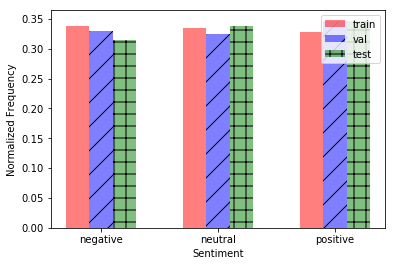

In [7]:
#Let's look at the histograms to make sure the distributions still match
offset = 0.2
temp_hist = df.loc[train.index,'sentiment'].value_counts()/len(df.loc[train.index])
plt.bar(temp_hist.index-offset,temp_hist.values, align='center',width=0.2,color='r',alpha=0.5,label='train')
temp_hist = df.loc[val.index,'sentiment'].value_counts()/len(df.loc[val.index])
plt.bar(temp_hist.index,temp_hist.values, align='center',width=0.2,color='b',alpha=0.5,hatch='/',label='val')
temp_hist = df.loc[test.index,'sentiment'].value_counts()/len(df.loc[test.index])
plt.bar(temp_hist.index+offset,temp_hist.values, align='center',width=0.2,color='g',alpha=0.5,hatch='+',label='test')
plt.legend()
plt.ylabel('Normalized Frequency')
plt.xlabel('Sentiment')
plt.xticks([-1,0,1],['negative','neutral','positive'])
plt.savefig('../images/train_test_dist.png')